In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [69]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
df = pd.read_csv('/content/drive/MyDrive/python-Saylani/Social_Network_Ads.csv')

In [71]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [72]:
df=df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [73]:
df.sample(5)

,Age,EstimatedSalary,Purchased
140,19,85000,0
153,36,50000,0
259,45,131000,1
92,26,15000,0
244,41,72000,0


In [74]:
df.shape

(400, 3)

In [75]:
x=df.drop('Purchased',axis=1)
y=df['Purchased']

In [76]:
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [77]:
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


## Train test split

In [78]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

x_train.shape, x_test.shape

((280, 2), (120, 2))

# StandardScaler

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train)

# transform train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [80]:
scaler.mean_

array([3.73964286e+01, 6.91321429e+04])

In [81]:
x_train

,Age,EstimatedSalary
360,43,129000
57,28,79000
119,41,59000
293,37,77000
41,33,51000
...,...,...
71,24,27000
184,33,60000
270,43,133000
20,45,22000


In [82]:
x_train_scaled

array([[ 0.53144872,  1.75536638],
       [-0.89116736,  0.2893323 ],
       [ 0.34176658, -0.29708134],
       [-0.03759771,  0.23069093],
       [-0.416962  , -0.53164679],
       [ 0.05724336,  1.28623547],
       [-0.98600843, -0.32640202],
       [ 1.57470052, -1.26466383],
       [ 2.14374695, -0.79553292],
       [-0.70148522, -0.59028815],
       [-0.416962  , -0.82485361],
       [-0.79632629, -0.76621224],
       [ 1.19533623,  0.55321843],
       [ 0.24692551, -0.3557227 ],
       [-0.89116736,  0.52389775],
       [-1.27053165, -1.35262588],
       [-0.22727986, -0.73689156],
       [-0.70148522,  0.31865298],
       [ 0.24692551,  1.11031138],
       [-0.51180307,  1.4035182 ],
       [ 0.81597194, -0.29708134],
       [ 0.24692551, -0.64892952],
       [ 0.43660765, -0.44368474],
       [-0.22727986,  1.13963207],
       [-1.4602138 , -0.17979861],
       [ 1.19533623, -0.73689156],
       [-1.74473701, -1.29398451],
       [-1.27053165,  0.43593571],
       [-1.27053165,

In [83]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [84]:
x_train.describe()

,Age,EstimatedSalary
count,280.000000,280.000000
mean,37.396429,69132.142857
std,10.562834,34166.685587
min,18.000000,15000.000000
25%,29.000000,43000.000000
50%,37.000000,65000.000000
75%,45.000000,86250.000000
max,60.000000,150000.000000


In [85]:
x_train_scaled.describe()

,Age,EstimatedSalary
count,2.800000e+02,2.800000e+02
mean,-9.516197e-17,6.661338e-17
std,1.001791e+00,1.001791e+00
min,-1.839578e+00,-1.587191e+00
25%,-7.963263e-01,-7.662122e-01
50%,-3.759771e-02,-1.211572e-01
75%,7.211309e-01,5.019072e-01
max,2.143747e+00,2.371101e+00


# Effect of Scaling

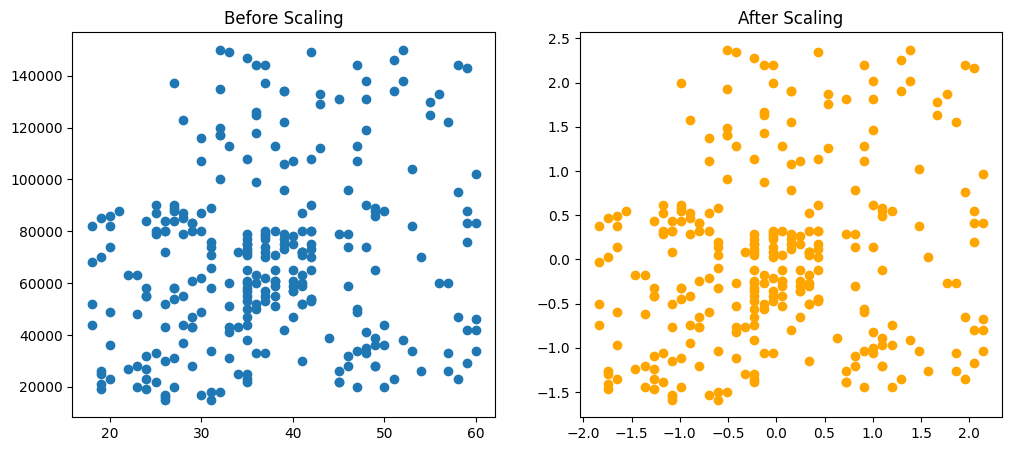

In [86]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'],color='orange')
ax2.set_title("After Scaling")
plt.show()

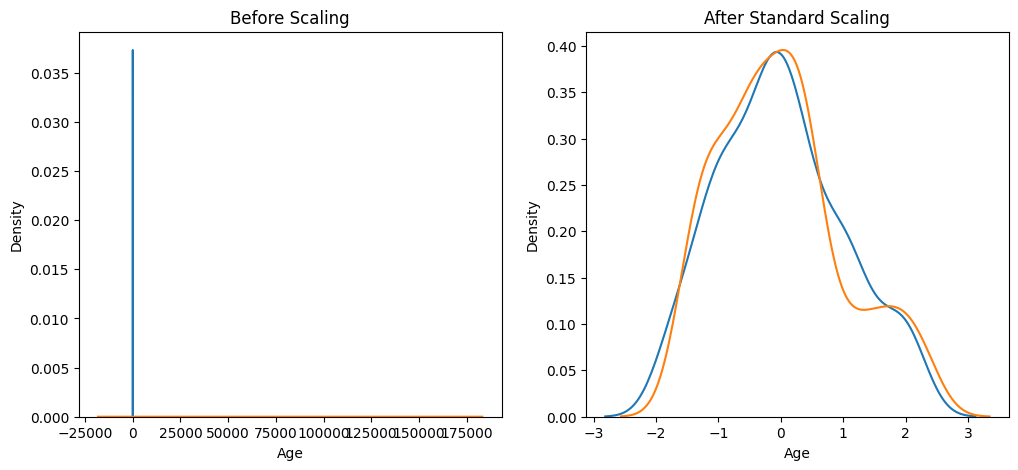

In [87]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Comparison of Distributions

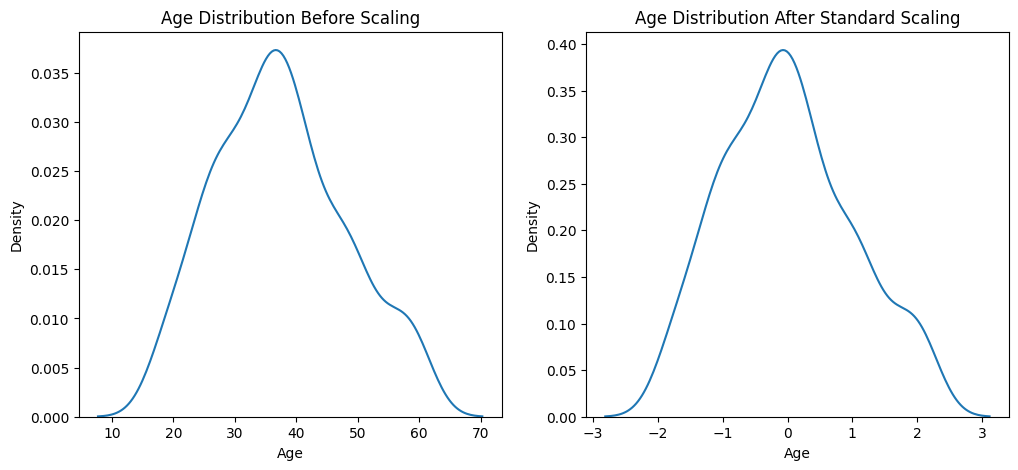

In [88]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
plt.show()

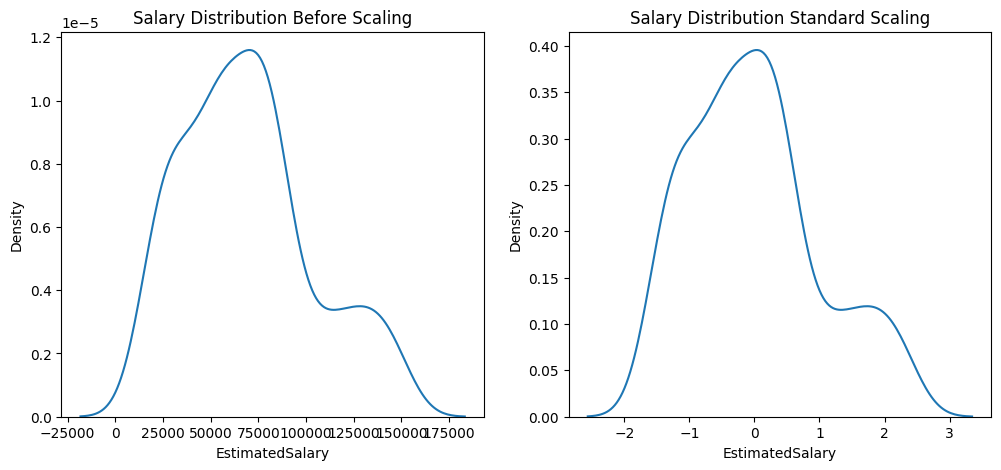

In [89]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Why scaling is important?

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [92]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [93]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [94]:
from sklearn.metrics import accuracy_score

In [95]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.7666666666666667
Scaled 0.7833333333333333


In [96]:
from sklearn.tree import DecisionTreeClassifier

In [97]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [98]:
dt.fit(x_train,y_train)
dt_scaled.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [99]:
y_pred = dt.predict(x_test)
y_pred_scaled = dt_scaled.predict(x_test_scaled)

In [100]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.8833333333333333
Scaled 0.8833333333333333


In [101]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# Effect of Outlier

In [102]:
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)

AttributeError: 'DataFrame' object has no attribute 'append'

In [103]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


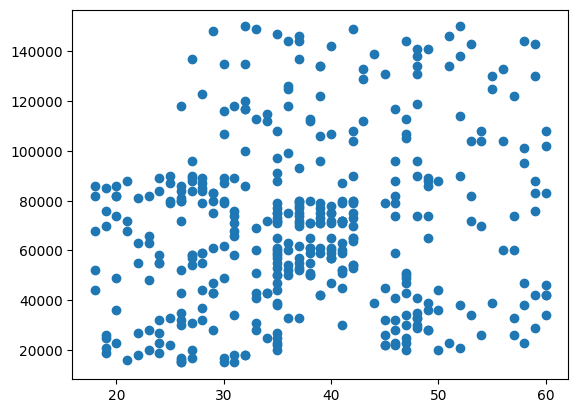

In [104]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

In [106]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [107]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

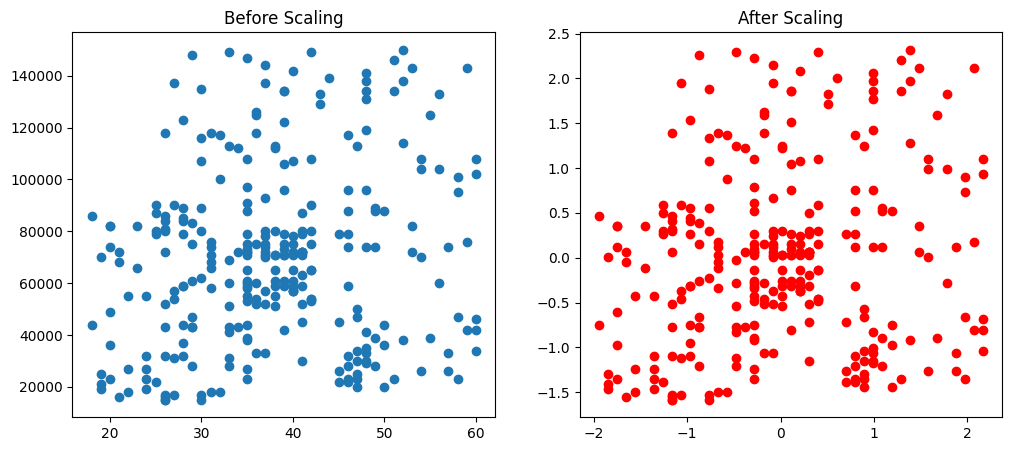

In [108]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()